In [53]:
%%script false --no-raise-error

%%bash
pip3 install numpy
pip3 install pandas
pip3 install matplotlib==3.7.0
pip3 install tikzplotlib

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pathlib import Path

In [55]:
from packaging.version import Version
if Version(matplotlib.__version__) > Version('3.7.0'):
    raise RuntimeWarning('tikzplotlib cant work with matplotlib > 3.7')

import tikzplotlib
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

In [56]:
ROOT_PATH = Path('./..')

LATEX_PATH = ROOT_PATH / 'paper'

CPP_BUILD_PATH = ROOT_PATH / 'build'
STATES_CVS_PATH = CPP_BUILD_PATH / 'states.csv'

# Расходно напорная характеристика

In [57]:
# initials
P = np.array([2808.80274448953, 2964.84734140562, 2902.42950263918, 2715.17598633988, 2496.71355065736, 2325.06449404967, 2059.78867929232, 1279.5656947119, 592.969468281124])
Q = np.array([0, 5.58329944639905, 11.1665988927981, 16.7498983391972, 22.3331977855962, 25.1248475087957, 27.9164972319952, 33.4997966783943, 37.9664362355135])

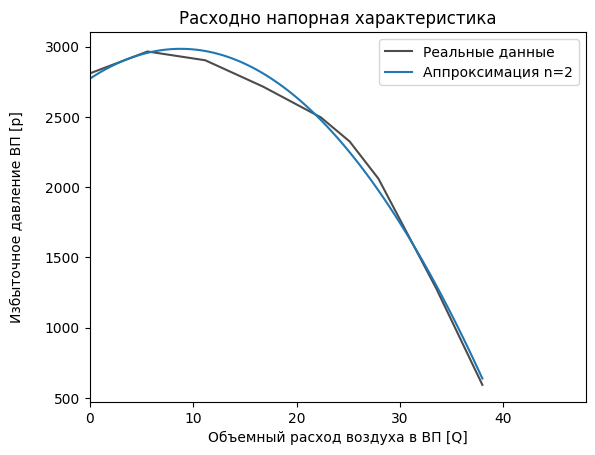

In [58]:
fig, ax = plt.subplots()

ax.plot(Q, P, 'k', label='Реальные данные', alpha=0.7)

_z = np.polyfit(Q, P, 2)
_p = np.poly1d(_z)
_dp = _p.deriv()
_xp = np.linspace(Q.min(), Q.max(), 100)
ax.plot(_xp, _p(_xp), label=f'Аппроксимация n={2}')

ax.set_xlabel('Объемный расход воздуха в ВП [Q]')
ax.set_ylabel('Избыточное давление ВП [p]', labelpad=15)
ax.set_xlim(Q.min(), Q.max() + 10)
plt.title('Расходно напорная характеристика')
plt.legend()
plt.plot();

# tikzplotlib_fix_ncols(fig)
# tikzplotlib.save(LATEX_PATH / 'graph_tikz.tex')


In [68]:
print('Квадратичная функция: ', _p, sep='\n')
A, B, C = _p.coefficients
q_max = 8.791162734091653
print('Вершина параболы:', -B / 2 / A)
print('Максимальное давление:', _p(q_max))

Квадратичная функция: 
        2
-2.756 x + 48.46 x + 2771
Вершина параболы: 8.791162734091653
Максимальное давление: 2983.8648146802116


In [60]:
def Qin(p: float) -> float:
    A = -2.756;
    B = 48.46;
    C = 2771 - p;
    D = B * B - 4 * A * C;
    return (-B - np.sqrt(D)) / 2 / A;


def Qout(p: float) -> float:
    Sgap = 0.3
    rho = 1.269
    chi = 1
    return chi * np.sqrt(2 * p / rho) * Sgap

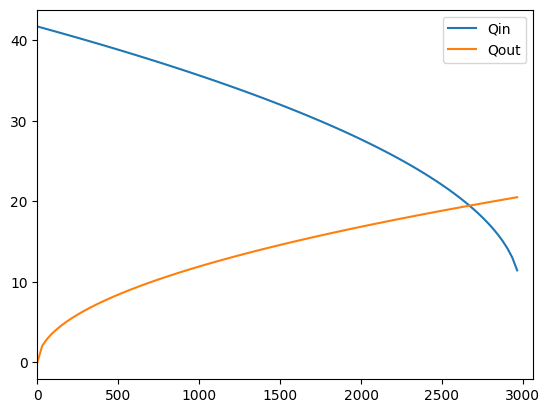

In [61]:
fig, ax = plt.subplots()
_xp = np.linspace(0, P.max(), 100)
ax.plot(_xp, Qin(_xp), label='Qin')
ax.plot(_xp, Qout(_xp), label='Qout')
ax.set_xlim(0, P.max() + 100)
plt.legend()
plt.plot();

## Визуализация состояний системы

In [62]:
SIMULATION_DT = 0.05

df = pd.read_csv(STATES_CVS_PATH)
df['dt'] = df.index * SIMULATION_DT
df.head()

,V,H,W,p,Vphi,phi,Qin,Qout,dt
0,-0.49000,0.000000,31.5000,3000.0,0.000,0.0000,0.0000,0.825137,0.00
1,-0.13625,-0.024500,29.2950,3000.0,0.054,0.0000,0.0000,0.825137,0.05
2,0.21750,-0.031313,28.9249,3000.0,0.108,0.0027,0.0000,0.825137,0.10
3,0.57125,-0.020438,30.3896,0.0,0.162,0.0081,41.6967,0.000000,0.15
4,0.08125,0.008125,33.6892,0.0,0.162,0.0162,41.6967,0.000000,0.20


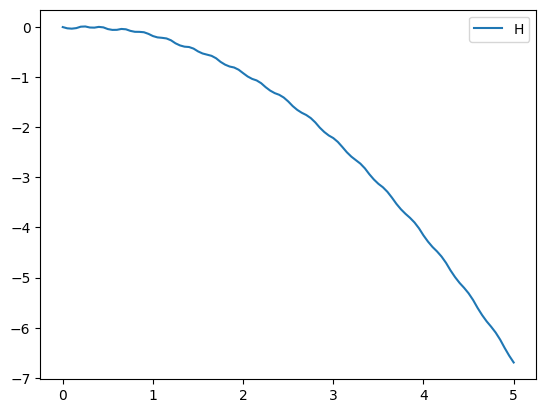

In [63]:
fig, ax = plt.subplots()
ax.plot(df['dt'], df['H'], label='H')
plt.legend()
plt.plot();